# Stock Statistics

Statistics is a branch of applied mathematics concerned with collecting, organizing, and interpreting data. Statistics is also the mathematical study of the likelihood and probability of events occurring based on known quantitative data or a collection of data.

http://www.icoachmath.com/math_dictionary/Statistics

In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [77]:
# input
symbols = ['BITI', 'BITO']
start = '2014-01-01'
end = '2024-01-11'

# Read data 
#df = yf.download(symbol,start,end)
for symbol in symbols:
    df = yf.download(symbol,start,end)
    # View Columns
    df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


In [63]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-04,12.67,12.71,12.195,12.42,12.42,1669200
2024-01-05,12.54,12.76,12.370,12.50,12.50,1785800
2024-01-08,12.20,12.29,11.540,11.66,11.66,4545200
2024-01-09,11.70,11.80,11.640,11.75,11.75,2360900
2024-01-10,12.10,12.27,11.738,11.91,11.91,6102800


In [64]:

returns = df['Adj Close'].pct_change()[1:].dropna()

### Mean is the average number, sum of the values divided by the number of values.
### Median is the middle value in the list of numbers.
### Mode is the value that occurs often.

In [65]:
import statistics as st

print('Mean of returns:', st.mean(returns))
print('Median of returns:', st.median(returns))
print('Median Low of returns:', st.median_low(returns))
print('Median High of returns:', st.median_high(returns))
print('Median Grouped of returns:', st.median_grouped(returns))
print('Mode of returns:', st.mode(returns))

Mean of returns: -0.002411526810862025
Median of returns: -0.0009087048660860741
Median Low of returns: -0.0009087048660860741
Median High of returns: -0.0009087048660860741
Median Grouped of returns: -0.0009087048660860741
Mode of returns: 0.0


In [66]:
from statistics import mode

print('Mode of returns:', mode(returns))
# Since all of the returns are distinct, we use a frequency distribution to get an alternative mode.
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)
# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of returns: 0.0
Mode of bins: [(-0.008680305472877459, 0.009167314739858268)]


### Arithmetic Average Returns is average return on the the stock or investment

In [67]:
print('Arithmetic average of returns:\n')
print(returns.mean())

Arithmetic average of returns:

-0.002411526810862025


### Geometric mean is the average of a set of products, the calculation of which is commonly used to determine the performance results of an investment or portfolio. It is technically defined as "the nth root product of n numbers." The geometric mean must be used when working with percentages, which are derived from values, while the standard arithmetic mean works with the values themselves.  

https://www.investopedia.com/terms/h/harmonicaverage.asp

In [68]:
# Geometric mean
from scipy.stats.mstats import gmean
print('Geometric mean of stock:', gmean(returns))

Geometric mean of stock: nan


In [69]:
ratios = returns + np.ones(len(returns))
R_G = gmean(ratios) - 1
print('Geometric mean of returns:', R_G)

Geometric mean of returns: -0.0030387513775171904


### Standard deviation of returns is the risk of returns

In [70]:
print('Standard deviation of returns')
print(returns.std())

Standard deviation of returns
0.03508749749951356


In [71]:
T = len(returns)
init_price = df['Adj Close'][0]
final_price = df['Adj Close'][T]
print('Initial price:', init_price)
print('Final price:', final_price)
print('Final price as computed with R_G:', init_price*(1 + R_G)**T)

Initial price: 39.14759826660156
Final price: 11.90999984741211
Final price as computed with R_G: 11.909999847412669


### Harmonic Mean is numerical average. 

Formula: A set of n numbers, add the reciprocals of the numbers in the set, divide the sum by n, then take the reciprocal of the result.

In [72]:
# Harmonic mean

print('Harmonic mean of returns:', len(returns)/np.sum(1.0/returns))

Harmonic mean of returns: 0.0


Skew: -0.5889978256168351
Mean: -0.002411526810862025
Median: -0.0009087048660860741


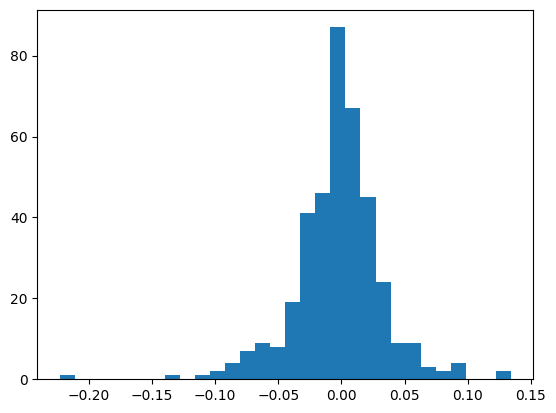

In [73]:
print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 30); 

Excess kurtosis of leptokurtic distribution: (array([-0.06868867, -0.31556021, -1.81736508, ...,  0.68477894,
       -0.13102533,  0.65429871]), array([2., 2., 2., ..., 2., 2., 2.]))
Excess kurtosis of mesokurtic distribution: (array([-0.06868867, -0.31556021, -1.81736508, ...,  0.68477894,
       -0.13102533,  0.65429871]), array([1., 1., 1., ..., 1., 1., 1.]))
Excess kurtosis of platykurtic distribution: (array([-0.06868867, -0.31556021, -1.81736508, ...,  0.68477894,
       -0.13102533,  0.65429871]), array([1.28986813, 1.28986813, 1.28986813, ..., 1.28986813, 1.28986813,
       1.28986813]))


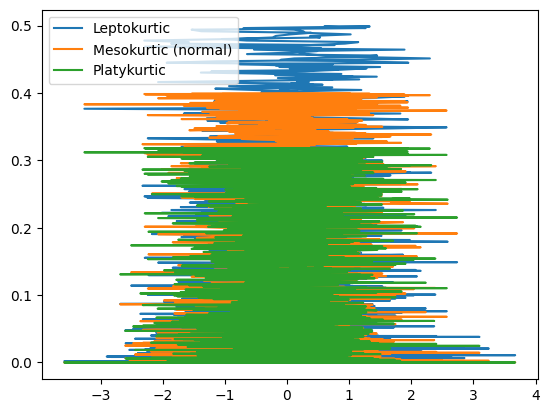

In [74]:
# Assuming 'returns' is your array of stock returns
returns = np.random.normal(size=2522)  # Replace this with your actual returns

# Plot some example distributions of stock's returns
xs = np.linspace(-6, 6, 2522)  # Use the same length as the 'returns' array
normal = stats.norm.pdf(xs)
plt.plot(returns, stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(returns)))
plt.plot(returns, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(returns)))
plt.plot(returns, stats.cosine.pdf(xs), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(returns)))
plt.legend()

plt.show()

In [75]:
print("Excess kurtosis of returns: ", stats.kurtosis(returns))

Excess kurtosis of returns:  -0.034486817323409635


In [76]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely normal.
